# Homework 1: Language models (50 points)

The first homework focuses on the following skills: being able to work with simple formal exercises on language modeling, on understanding and being able to extract properties and configurations of state-of-the-art language models and, finally, training language models yourself!

### Logistics

* submission deadline: May 15th 23:59 German time via Moodle
  * please upload a **SINGLE ZIP FILE named Surname_FirstName_HW1.zip** containing the .ipynb file of the notebook (if you solve it on Colab, you can go to File > download), the json file for Ex. 2 and a .png or .jpg file with your losses plot from Ex. 3.
* please solve and submit the homework **individually**! 
* if you use Colab, to speed up the execution of the code on Colab (especially Exercise 3), you can use the available GPU (if Colab resources allow). For that, before executing your code, navigate to Runtime > Change runtime type > GPU > Save.

## Exercise 1: Understanding language modeling (12 points)

Please answer the following exercises. Importantly, please reason step by step; i.e., where calculations are required, please provide intermediate steps of how you arrived at your solution. You do not need to write any code, just mathematical solutions.

> 1. [6pts] Consider the corpus $C$ with the following sentences: $C=${"The cat sleeps", "The mouse sings", "The cat sleeps", "A dog sings"}. 
> (a) Define the vocabulary $V$ of this corpus (assuming by-word tokenization).
> (b) Pick one of the four sentences in $C$. Formulate the probability of that sentence in the form of the chain rule. Calculate the probability of each termn in the chain rule, given the corpus.
> 2. [4pts] We want to train a neural network that takes as input two numbers $x_1, x_2$, passes them through three hidden linear layers, each with 13 neurons, each followed by the ReLU activation function, and outputs three numbers $y_1, y_2, y_3$. Write down all weight matrices of this network with their dimensions. (Example: if one weight matrix has the dimensions 3x5, write $M_1\in R^{3\times5}$) 
> 3. [2pts] Consider the sequence: "Input: Some students trained each language model". Assuming that each word+space/punctuation corresponds to one token, consider the following token probabilities of this sequence under some trained language model: $p = [0.67, 0.91, 0.83, 0.40, 0.29, 0.58, 0.75]$. Compute the average surprisal of this sequence under that language model. [Note: in this class we always assume the base $e$ for $log$, unless indicated otherwise. This is also usually the case throughout NLP.]

---

**1.**

**a**. Assuming *by-word* tokenization (individual words as tokens), we have the following vocabulary:
$$ 
V = \{the, \; cat, \;sleeps, \;mouse, \;sings, \;a, \;dog\},
$$
so the total no. of unique words in the vocabulary $=|V|=7$.

**b**. Taking the sentence: "The cat sleeps", its probability can be computed as:
$$
p(the \;cat \;sleeps) = p(the) \times p(cat \;|\; the) \times p(sleeps \;|\; the \;cat)
$$

To calculate each of these (conditional) probabilities, we need to inspect the corresponding frequencies (or words, word pairs, or word triplets) in the corpus. For individual words, we compute the frequencies of each word in the corpus, and that gives:
```
{the: 3, cat: 2, sleeps: 2, mouse: 1, sings: 2, a: 1, dog: 1}
```
hence $p(the) = \frac{3}{12}$.

For bigram probabilities, we need to compute a table that gives the $Count(w_{i+1}|w_i)$, i.e., how many times in the corpus the word $w_{i+1}$ has followed the word $w_i$, and we can normalize each row to get the corresponding probabilities.

{"The cat sleeps", "The mouse sings", "The cat sleeps", "A dog sings"}

| $w_{i+1}$ $\rightarrow$ |  the | cat | sleeps | mouse | sings | a | dog |
| :---        |    :----:   | :---: | :---: |:---: | :---: | :---: | :---: |
| $w_i=$the      | 0 | 2 | 0 | 1 | 0 | 0 | 0 |
| $w_i=$cat      | 0 | 0 | 2 | 0 | 0 | 0 | 0 |
| $w_i=$sleeps      | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| $w_i=$mouse      | 0 | 0 | 0 | 0 | 1 | 0 | 0 |
| $w_i=$sings      | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| $w_i=$a      | 0 | 0 | 0 | 0 | 0 | 0 | 1 |
| $w_i=$dog      | 0 | 0 | 0 | 0 | 1 | 0 | 0 |

From this table, $p(cat \;|\; the) = \frac{2}{3}$. This can also be computed using the count formula directly:
$$
p(cat \;|\; the) = \frac{Count(the \; cat \; sleeps)}{Count(the)} = \frac{2}{3}.
$$

Similarly, we can construct a table of size ${7 \choose 2} 2!$ x $7$ = $42$ x $7$ with all possible two-word prefixes to predict the third word. This table will be mostly sparse. We can simply compute $p(sleeps \;|\; the \;cat)$ using the count formula:
$$
p(sleeps \;|\; the \;cat) = \frac{Count(the \; cat \; sleeps)}{Count(the \; cat)} = \frac{2}{2} = 1.
$$

Final probability:
$$
p(the \;cat \;sleeps) = p(the) \times p(cat \;|\; the) \times p(sleeps \;|\; the \;cat) = \frac{3}{12} \times \frac{2}{3} \times 1 = \frac{1}{6}.
$$

---

**2.**

The shapes of vectors in the neural network: `2 (input) --> 13 (h1) --> 13 (h2) --> 13 (h3) --> 3 (output)`. So there are four linear layers/weight matrices in the network, and assuming the input to the network having shape `[N, 2]` where `N` is the batch dimension, the matrices have dimensions: $M_1\in \mathbb{R}^{2\times13}$, $M_2\in \mathbb{R}^{13\times13}$, $M_3\in \mathbb{R}^{13\times13}$ and $M_4\in \mathbb{R}^{13\times3}$.

---
**3.**
The following probabilities are given (assuming beginning and end of sentence tokens):
- p(some | `<bos>`) = $0.67$
- p(students | some) = $0.91$
- p(trained | some students) = $0.83$
- p(each | some students trained) = $0.40$
- p(language | some students trained each) = $0.29$
- p(model | some students trained each language) = $0.58$
- p(`<eos>` | some students trained each language model) = $0.75$

$P_{LM}(some, \;students, \;trained, \;each, \;language, \;model, .) = p(some | \langle bos \rangle) \times \dots \times p(\langle eos \rangle | some, \;students, \;trained, \;each, \;language, \;model)$

and average surprisal of the given sequence $=-\frac{1}{7}\;\log P_{LM}\;(some, students, trained, each, language, model, .) \approx 0.523956.  $

---

In [5]:
p = torch.tensor([0.67, 0.91, 0.83, 0.40, 0.29, 0.58, 0.75])
surprisal = -p.log().sum() / len(p)
surprisal.item()

0.5239560604095459

## Exercise 2: Extracting LLM fingerprints (15 points)

For this task, your job is to extract the "fingerprint" of a state-of-the-art large language model from the paper. Specifically, you job is to: 
* find the model that is assigned to your surname in the list **HW1_Model2Group_assignment.csv** (to be found on Moodle under topic 02). Please investigate the latest version of your model, unless the version is specified in the list.
* find out the following charactersitcs of your model 
* submit a json file with your responses in the following format (below is a partial example). 
 
Note that, of course, it might be that some information is not available or that some categories are not applicable. The idea is, that, as a course we can create a fun website which will show a somewhat comprehensive graphical comparison of current language models and their configurations. Based on your collective json files, the lecturers will set up a front end at some point during the class.

**IMPORTANT**: Please email the lecturers by the homework deadline if you DO NOT consent that your json file is used for this idea.

In [2]:
phi2 = {
    "model_name": "Microsoft Phi-2",
    "huggingface_model_id": "microsoft/phi-2",
    "paper_url": "https://www.microsoft.com/en-us/research/blog/phi-2-the-surprising-power-of-small-language-models/",
    "tokenizer_type": "BPE (CodeGen Tokenizer)",
    "vocabulary_size": "51200", # vocab size discrepancy: https://huggingface.co/microsoft/phi-2/discussions/97
    "architecture": "transformer stack with causal language modeling head",
    "architecture_type": "decoder only",
    "architecture_quirks": [
        "vocab size discrepancy - it has embedding size as 51200 to accommodate any new tokens",
        "can choose/configure among three attention classes - regular attention, flash attention, and scaled dot product attention",
        "has attention overflow issue with FP16, requires enabling/disabling autocast on PhiAttention.forward() function",
    ],
    "parameters": "2.7B",
    "finetuning_type": "not finetuned",
    "training_data_cutoff": "2023", # time of release 
    "number_training_tokens": "1.4T tokens",
    "pretraining_data_size": "250B tokens",
    "finetuning_data_size": "NA",
    "training_data": [
        "python codes from The Stack v1.2",
        "q&a content from StackOverflow",
        "google-deepmind code_contests dataset",
        "synthetic python textbooks and exercises generated by gpt-3.5-turbo-0301",
        "various NLP synthetic texts",
        "filtered websites (Falcon RefinedWeb and SlimPajama assessed by gpt-4) for safety and educational value",
    ],
    "finetuning_data": [],
    "access": "open",
    "summary": "Phi-2 is a relatively smaller language model (only 2.7B params), but it surpasses or matches performances of models upto 25x larger (Mistral (7B) or Llama-2 (13B) models) on coding and math tasks. It was neither further finetuned with RLHF, nor instruction fine-tuned, so its generation capability is non-restricted, and because of its compact size, researchers can use it to explore safety, fairness and bias related challenges in LMs."
}
phi2

{'model_name': 'Microsoft Phi-2',
 'huggingface_model_id': 'microsoft/phi-2',
 'paper_url': 'https://www.microsoft.com/en-us/research/blog/phi-2-the-surprising-power-of-small-language-models/',
 'tokenizer_type': 'BPE (CodeGen Tokenizer)',
 'vocabulary_size': '51200',
 'architecture': 'transformer stack with causal language modeling head',
 'architecture_type': 'decoder only',
 'architecture_quirks': ['vocab size discrepancy - it has embedding size as 51200 to accommodate any new tokens',
  'can choose/configure among three attention classes - regular attention, flash attention, and scaled dot product attention',
  'has attention overflow issue with FP16, requires enabling/disabling autocast on PhiAttention.forward() function'],
 'parameters': '2.7B',
 'finetuning_type': 'not finetuned',
 'training_data_cutoff': '2023',
 'number_training_tokens': '1.4T tokens',
 'pretraining_data_size': '250B tokens',
 'finetuning_data_size': 'NA',
 'training_data': ['python codes from The Stack v1.2',

In [3]:
import json
with open('ex2_phi2model.json', 'w') as fp:
    json.dump(phi2, fp)

## Exercise 3: Fine-tuning GPT-2 for QA (23 points)

The learning goal of this exercise is to practice fine-tuning a pretrained LM, GPT-2 small, for a particular task, namely commonsense question answering (QA). We will use a task-specific dataset, [CommonsenseQA](https://huggingface.co/datasets/tau/commonsense_qa), that was introduced by [Talmor et al. (2018)](https://arxiv.org/abs/1811.00937). We will evaluate the performance of the model on our test split of the dataset over training to monitor whether the model's performance is improving and compare the performance of the base pretrained GPT-2 and the fine-tuned model. We will need to perform the following steps: 

1. Prepare data according to steps described in [sheet 1.1](https://cogsciprag.github.io/Understanding-LLMs-course/tutorials/01-introduction.html#main-training-data-processing-steps)
   1. additionally to these steps, prepare a custom Dataset (like in [sheet 2.3](https://cogsciprag.github.io/Understanding-LLMs-course/tutorials/02c-MLP-pytorch.html#preparing-the-training-data)) that massages the dataset from the format that it is shipped in on HuggingFace into strings that can be used for training. Some of the procesing steps will happen in the Dataset.
2. Load the pretrained GPT-2 model
3. Set up training pipeline according to steps described in [sheet 2.5]()
4. Run the training while tracking the losses
5. Save plot of losses for submission

Your tasks:
> 1. [19pts] Complete the code in the spots where there is a comment "#### YOUR CODE HERE ####". There are instructions in the comments as to what the code should implement. With you completed code, you should be able to let the training run without errors. Note that the point of the exercise is the implementation; we should not necessarily expect great performance of the fine-tuned model (and the actual performance will *not* be graded). Often there are several correct ways of implementing something. Anything that is correct will be accepted.
> 2. [4pts] Answer questions at the end of the execise.

In [1]:
# note: if you are on Colab, you might need to install some requirements
# as we did in Sheet 1.1. Otherwise, don't forget to activate your local environment

from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, GPT2Tokenizer, GPT2LMHeadModel
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

/Users/swagatam/miniconda3/envs/ullm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# additioanlly, we need to install accelerate
# uncomment and run the following line on Colab or in your environment
# !pip install accelerate
# NOTE: in a notebook, reloading of the kernel might be required after installation if you get dependency errors with the transformers package

In [3]:
### 1. Prepare data with data prepping steps from sheet 1.1

# a. Acquiring data
# b. (minimally) exploring dataset
# c. cleaning / wrangling data (combines step 4 from sheet 1.1 and step 1.1 above)
# d. splitting data into training and test set (we will not do any hyperparam tuning) 
# (we don't need further training set wrangling)
# e. tokenizing data and making sure it can be batched (i.e., conversted into 2d tensors)
# this will also happen in our custom Dataset class (common practice when working with text data)

In [4]:
# downaload dataset from HF
dataset = load_dataset("tau/commonsense_qa")

In [5]:
# inspect dataset
print(dataset.keys())
# print a sample from the dataset
### YOUR CODE HERE ####
print(f'\none sample from train split \n---\n {dataset["train"][0]}\n')
print(f'one sample from validation split \n---\n {dataset["validation"][0]}\n')
print(f'one sample from the test split \n---\n {dataset["test"][0]}')

dict_keys(['train', 'validation', 'test'])

one sample from train split 
---
 {'id': '075e483d21c29a511267ef62bedc0461', 'question': 'The sanctions against the school were a punishing blow, and they seemed to what the efforts the school had made to change?', 'question_concept': 'punishing', 'choices': {'label': ['A', 'B', 'C', 'D', 'E'], 'text': ['ignore', 'enforce', 'authoritarian', 'yell at', 'avoid']}, 'answerKey': 'A'}

one sample from validation split 
---
 {'id': '1afa02df02c908a558b4036e80242fac', 'question': 'A revolving door is convenient for two direction travel, but it also serves as a security measure at a what?', 'question_concept': 'revolving door', 'choices': {'label': ['A', 'B', 'C', 'D', 'E'], 'text': ['bank', 'library', 'department store', 'mall', 'new york']}, 'answerKey': 'A'}

one sample from the test split 
---
 {'id': '90b30172e645ff91f7171a048582eb8b', 'question': 'The townhouse was a hard sell for the realtor, it was right next to a high rise what?', 'question_

Note that the test split does not have ground truth answer labels. Therefore, **we will use the validation split as our test split**.

In [6]:
# load tokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
# set padding side to be left because we are doing causal LM
tokenizer.padding_side = "left"

In [7]:
def massage_input_text(example):
    """
    Helper for converting input examples which have 
    a separate qquestion, labels, answer options
    into a single string.

    Arguments
    ---------
    example: dict
        Sample input from the dataset which contains the 
        question, answer labels (e.g. A, B, C, D),
        the answer options for the question, and which 
        of the answers is correct.
    
    Returns
    -------
    input_text: str
        Formatted training text which contains the question,
        the forwatted answer options (e.g., 'A. <option 1> B. <option 2>' etc)
        and the ground truth answer.
    """
    # combine each label with its corresponding text
    answer_options_list = list(zip(
        example["choices"]["label"],
        example["choices"]["text"]
    ))
    # join each label and text with . and space
    answer_options = ['. '.join(y) for y in answer_options_list] ### YOUR CODE HERE ####
    # join the list of options with spaces into single string
    answer_options_string = ' '.join(answer_options) ### YOUR CODE HERE ####
    # combine question and answer options
    input_text = example["question"] + " " + answer_options_string
    # append the true answer with a new line, "Answer: " and the label
    input_text += "\nAnswer: " + example["answerKey"]

    return input_text

# process input texts of train and test sets
massaged_datasets = dataset.map(
    lambda example: {
        "text": massage_input_text(example)
    }
)

In [8]:
# inspect a sample from our preprocessed data
massaged_datasets["train"][0]

{'id': '075e483d21c29a511267ef62bedc0461',
 'question': 'The sanctions against the school were a punishing blow, and they seemed to what the efforts the school had made to change?',
 'question_concept': 'punishing',
 'choices': {'label': ['A', 'B', 'C', 'D', 'E'],
  'text': ['ignore', 'enforce', 'authoritarian', 'yell at', 'avoid']},
 'answerKey': 'A',
 'text': 'The sanctions against the school were a punishing blow, and they seemed to what the efforts the school had made to change? A. ignore B. enforce C. authoritarian D. yell at E. avoid\nAnswer: A'}

In [9]:
massaged_datasets["validation"][0], massaged_datasets["test"][0]

({'id': '1afa02df02c908a558b4036e80242fac',
  'question': 'A revolving door is convenient for two direction travel, but it also serves as a security measure at a what?',
  'question_concept': 'revolving door',
  'choices': {'label': ['A', 'B', 'C', 'D', 'E'],
   'text': ['bank', 'library', 'department store', 'mall', 'new york']},
  'answerKey': 'A',
  'text': 'A revolving door is convenient for two direction travel, but it also serves as a security measure at a what? A. bank B. library C. department store D. mall E. new york\nAnswer: A'},
 {'id': '90b30172e645ff91f7171a048582eb8b',
  'question': 'The townhouse was a hard sell for the realtor, it was right next to a high rise what?',
  'question_concept': 'townhouse',
  'choices': {'label': ['A', 'B', 'C', 'D', 'E'],
   'text': ['suburban development',
    'apartment building',
    'bus stop',
    'michigan',
    'suburbs']},
  'answerKey': '',
  'text': 'The townhouse was a hard sell for the realtor, it was right next to a high rise w

In [10]:
class CommonsenseQADataset(Dataset):
    """
    Custom dataset class for CommonsenseQA dataset.
    """

    def __init__(
            self, 
            train_split, 
            test_split,
            tokenizer,
            max_length=64,
            dataset_split="train",
        ) -> None:
        """
        Initialize the dataset object.
        
        Arguments
        ---------
        train_split: dict
            Training data dictionary with different columns.
        test_split: dict
            Test data dictionary with different columns.
        tokenizer: Tokenizer
            Initialized tokenizer for processing samples.
        max_length: int
            Maximal length of inputs. All inputs will be 
            truncated or padded to this length.
        dataset_split: str
            Specifies which split of the dataset to use. 
            Default is "train".
        """
        self.train_split = train_split['text']
        self.test_split = test_split['text']
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.dataset_split = dataset_split

    def __len__(self):
        """
        Method returning the length of the training dataset.
        """
        
        if self.dataset_split == "train":
            return len(self.train_split) ### YOUR CODE HERE ####
        return len(self.test_split)
    
    def __getitem__(self, idx):
        """
        Method returning a single training example.
        Note that it also tokenizes, truncates or pads the input text.
        Further, it creates a mask tensor for the input text which 
        is used for causal masking in the transformer model.

        Arguments
        ---------
        idx: int
            Index of training sample to be retrieved from the data.
        
        Returns
        --------
        tokenized_input: dict
            Dictionary with input_ids (torch.Tensor) and an attention_mask
            (torch.Tensor).
        """
        # retrieve a training sample at the specified index idx
        # HINT: note that this might depend on self.dataset_split
        if self.dataset_split == "train":
            input_text = self.train_split[idx]
        elif self.dataset_split == "test":
            input_text = self.test_split[idx] ### YOUR CODE HERE ####
        
        tokenized_input = self.tokenizer(
            input_text,
            max_length=self.max_length, ### YOUR CODE HERE ####
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        tokenized_input["attention_mask"] = (tokenized_input["input_ids"] != tokenizer.pad_token_id).long()
        return tokenized_input

In [11]:
# move to accelerated device 
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Device: {device}")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print(f"Device: {device}")
else:
    device = torch.device("cpu")
    print(f"Device: {device}")

Device: mps


In [12]:
# 2. init model

# load pretrained gpt2 for HF
model = GPT2LMHeadModel.from_pretrained("gpt2").to(device) ### YOUR CODE HERE ####
# print num of trainable parameters
model_size = sum(t.numel() for t in model.parameters())
print(f"GPT-2 size: {model_size/1000**2:.1f}M parameters")

GPT-2 size: 124.4M parameters


Hint: If you run out of memory while trying to run the training, try decreasing the batch size.

In [13]:
# 3. set up configurations required for the training loop

# instantiate dataset with the downloaded commonsense_qa data 
train_dataset = CommonsenseQADataset(
    ### YOUR CODE HERE ####
    massaged_datasets["train"],
    massaged_datasets["validation"],
    tokenizer,
)
# instantiate test dataset with the downloaded commonsense_qa data
test_dataset = CommonsenseQADataset(
    ### YOUR CODE HERE ####,
    massaged_datasets["train"],
    massaged_datasets["validation"],
    tokenizer,
    dataset_split="test"
)
# create a DataLoader for the dataset
# the data loader will automatically batch the data
# and iteratively return training examples (question answer pairs) in batches
dataloader = DataLoader(
    train_dataset, 
    batch_size=32, 
    shuffle=True
)
# create a DataLoader for the test dataset
# reason for separate data loader is that we want to
# be able to use a different index for retreiving the test batches
# we might also want to use a different batch size etc.
test_dataloader = DataLoader(
    test_dataset, 
    batch_size=32, 
    shuffle=True
)

In [14]:
# 4. run the training of the model
# Hint: for implementing the forward pass and loss computation, carefully look at the exercise sheets 
# and the links to examples in HF tutorials.

# put the model in training mode
model.train()
# move the model to the device (e.g. GPU)
model = model.to(device)

# trianing configutations 
# feel free to play around with these
epochs = 2
train_steps =  len(train_dataset) // 32
print("Number of training steps: ", train_steps)
# number of test steps to perform every 10 training steps
# (smaller that the entore test split for reasons of comp. time)
num_test_steps = len(test_dataset) // 32 # 5

# define optimizer and learning rate
optimizer = torch.optim.AdamW(model.parameters(),
                              lr=2e-4,
                              # lr=5e-4  # given
                             )

# define the loss function
loss_function = torch.nn.CrossEntropyLoss()

# define some variables to accumulate the losses
losses = []
test_losses = []

# iterate over epochs
for e in range(epochs):
    # iterate over training steps
    for i in tqdm(range(train_steps)):
        # get a batch of data
        x = next(iter(dataloader))
        # move the data to the device (GPU)
        x = x.to(device)
        
        # forward pass through the model
        x['input_ids'] = x['input_ids'].squeeze(1)
        x['attention_mask'] = x['attention_mask'].squeeze(1)
        outputs = model(
            **x
        )
        # get the loss
        logits = outputs.logits
        targets = x['input_ids']
        # print(logits.shape, targets.shape)
        B, T, C = logits.shape
        # use next token prediction loss with proper shifting of tokens
        # just predict the answer key token as for finetuning, no need to focus on other tokens
        # answer key token is the last one (as inspected in the batch), so use that as the target
        loss = loss_function(logits[:, -2, :], targets[:, -1])

        # this line calculates loss at each position in the sequence which is not necessary, we just need to predict answer key
        # loss = loss_function(logits[..., :-1, :].contiguous().view(B*(T-1), C),
        #                      targets[..., 1:].contiguous().view(B*(T-1))
        #                     )
        
        # backward pass
        loss.backward()
        losses.append(loss.item())
        
        # update the parameters of the model
        optimizer.step()

        # zero out gradient for next step
        optimizer.zero_grad()

        # evaluate on test set every 10 steps
        if i % 10 == 0:
            print(f"Epoch {e}, step {i}, loss {loss.item()}")
            # track test loss for the evaluation iteration
            test_loss = 0
            for j in range(num_test_steps):
                # get test batch
                x_test = next(iter(test_dataloader))
                x_test = x_test.to(device)
                x_test['input_ids'] = x_test['input_ids'].squeeze(1)
                x_test['attention_mask'] = x_test['attention_mask'].squeeze(1)
                with torch.no_grad():
                    test_outputs = model(
                        **x_test
                    )
                    logits = test_outputs.logits
                test_loss += loss_function(logits[:, -2, :], x_test['input_ids'][:, -1])
            test_losses.append(test_loss.item() / num_test_steps)
            print("Test loss: ", test_loss.item() / num_test_steps)

Number of training steps:  304


  0%|                                                   | 0/304 [00:00<?, ?it/s]

Epoch 0, step 0, loss 10.100526809692383


  0%|▏                                          | 1/304 [00:07<37:22,  7.40s/it]

Test loss:  2.2597110145970394


  3%|█▍                                        | 10/304 [00:13<03:51,  1.27it/s]

Epoch 0, step 10, loss 3.343229293823242


  4%|█▌                                        | 11/304 [00:20<13:22,  2.74s/it]

Test loss:  3.1884906166478206


  7%|██▊                                       | 20/304 [00:26<03:40,  1.29it/s]

Epoch 0, step 20, loss 2.1369102001190186


  7%|██▉                                       | 21/304 [00:34<12:44,  2.70s/it]

Test loss:  2.270207254510177


 10%|████▏                                     | 30/304 [00:40<03:32,  1.29it/s]

Epoch 0, step 30, loss 2.079723596572876


 10%|████▎                                     | 31/304 [00:47<12:03,  2.65s/it]

Test loss:  1.9885814064427425


 13%|█████▌                                    | 40/304 [00:53<03:24,  1.29it/s]

Epoch 0, step 40, loss 2.0545859336853027


 13%|█████▋                                    | 41/304 [01:00<11:47,  2.69s/it]

Test loss:  2.1408801831697164


 16%|██████▉                                   | 50/304 [01:07<03:11,  1.33it/s]

Epoch 0, step 50, loss 2.348806142807007


 17%|███████                                   | 51/304 [01:14<11:17,  2.68s/it]

Test loss:  2.4127080816971627


 20%|████████▎                                 | 60/304 [01:20<03:11,  1.28it/s]

Epoch 0, step 60, loss 6.989198684692383


 20%|████████▍                                 | 61/304 [01:27<10:45,  2.66s/it]

Test loss:  7.351905421206825


 23%|█████████▋                                | 70/304 [01:33<02:59,  1.31it/s]

Epoch 0, step 70, loss 7.576042175292969


 23%|█████████▊                                | 71/304 [01:40<10:23,  2.68s/it]

Test loss:  7.458835802580181


 26%|███████████                               | 80/304 [01:46<02:54,  1.29it/s]

Epoch 0, step 80, loss 6.392560958862305


 27%|███████████▏                              | 81/304 [01:54<09:59,  2.69s/it]

Test loss:  6.215960452431126


 30%|████████████▍                             | 90/304 [02:00<02:46,  1.29it/s]

Epoch 0, step 90, loss 5.413723945617676


 30%|████████████▌                             | 91/304 [02:07<09:32,  2.69s/it]

Test loss:  4.902527257015831


 33%|█████████████▍                           | 100/304 [02:13<02:38,  1.29it/s]

Epoch 0, step 100, loss 4.339285850524902


 33%|█████████████▌                           | 101/304 [02:20<09:04,  2.68s/it]

Test loss:  3.9197933799342106


 36%|██████████████▊                          | 110/304 [02:27<02:30,  1.29it/s]

Epoch 0, step 110, loss 3.0781617164611816


 37%|██████████████▉                          | 111/304 [02:34<08:38,  2.69s/it]

Test loss:  3.2137222290039062


 39%|████████████████▏                        | 120/304 [02:40<02:22,  1.29it/s]

Epoch 0, step 120, loss 3.3222146034240723


 40%|████████████████▎                        | 121/304 [02:47<08:11,  2.69s/it]

Test loss:  2.878708287289268


 43%|█████████████████▌                       | 130/304 [02:53<02:14,  1.29it/s]

Epoch 0, step 130, loss 2.3282930850982666


 43%|█████████████████▋                       | 131/304 [03:01<07:44,  2.69s/it]

Test loss:  2.5859820717259456


 46%|██████████████████▉                      | 140/304 [03:07<02:07,  1.29it/s]

Epoch 0, step 140, loss 2.4058308601379395


 46%|███████████████████                      | 141/304 [03:14<07:19,  2.69s/it]

Test loss:  2.3473735608552633


 49%|████████████████████▏                    | 150/304 [03:20<01:59,  1.29it/s]

Epoch 0, step 150, loss 2.5113725662231445


 50%|████████████████████▎                    | 151/304 [03:27<06:51,  2.69s/it]

Test loss:  2.119058709395559


 53%|█████████████████████▌                   | 160/304 [03:34<01:51,  1.29it/s]

Epoch 0, step 160, loss 1.8075895309448242


 53%|█████████████████████▋                   | 161/304 [03:41<06:23,  2.68s/it]

Test loss:  1.885526556717722


 56%|██████████████████████▉                  | 170/304 [03:47<01:43,  1.29it/s]

Epoch 0, step 170, loss 1.8050880432128906


 56%|███████████████████████                  | 171/304 [03:54<05:57,  2.68s/it]

Test loss:  1.7780976546438116


 59%|████████████████████████▎                | 180/304 [04:00<01:31,  1.36it/s]

Epoch 0, step 180, loss 1.7527949810028076


 60%|████████████████████████▍                | 181/304 [04:07<05:26,  2.66s/it]

Test loss:  1.8345226488615338


 62%|█████████████████████████▋               | 190/304 [04:14<01:28,  1.29it/s]

Epoch 0, step 190, loss 1.7439758777618408


 63%|█████████████████████████▊               | 191/304 [04:21<05:03,  2.68s/it]

Test loss:  1.8301861411646794


 66%|██████████████████████████▉              | 200/304 [04:27<01:20,  1.29it/s]

Epoch 0, step 200, loss 1.8739957809448242


 66%|███████████████████████████              | 201/304 [04:34<04:36,  2.68s/it]

Test loss:  1.891387337132504


 69%|████████████████████████████▎            | 210/304 [04:40<01:12,  1.29it/s]

Epoch 0, step 210, loss 1.8245832920074463


 69%|████████████████████████████▍            | 211/304 [04:48<04:09,  2.68s/it]

Test loss:  1.9575283652857731


 72%|█████████████████████████████▋           | 220/304 [04:54<01:05,  1.29it/s]

Epoch 0, step 220, loss 1.9632817506790161


 73%|█████████████████████████████▊           | 221/304 [05:01<03:42,  2.68s/it]

Test loss:  1.9085243626644737


 76%|███████████████████████████████          | 230/304 [05:07<00:55,  1.33it/s]

Epoch 0, step 230, loss 1.7801181077957153


 76%|███████████████████████████████▏         | 231/304 [05:14<03:14,  2.67s/it]

Test loss:  1.8545540257504112


 79%|████████████████████████████████▎        | 240/304 [05:21<00:49,  1.29it/s]

Epoch 0, step 240, loss 1.7608686685562134


 79%|████████████████████████████████▌        | 241/304 [05:28<02:49,  2.69s/it]

Test loss:  1.8139666507118626


 82%|█████████████████████████████████▋       | 250/304 [05:34<00:41,  1.29it/s]

Epoch 0, step 250, loss 1.7355449199676514


 83%|█████████████████████████████████▊       | 251/304 [05:41<02:22,  2.69s/it]

Test loss:  1.7578831722861843


 86%|███████████████████████████████████      | 260/304 [05:47<00:34,  1.29it/s]

Epoch 0, step 260, loss 1.7371573448181152


 86%|███████████████████████████████████▏     | 261/304 [05:55<01:55,  2.68s/it]

Test loss:  1.7574412697239925


 89%|████████████████████████████████████▍    | 270/304 [06:01<00:26,  1.29it/s]

Epoch 0, step 270, loss 1.7176316976547241


 89%|████████████████████████████████████▌    | 271/304 [06:08<01:28,  2.69s/it]

Test loss:  1.8040116962633634


 92%|█████████████████████████████████████▊   | 280/304 [06:14<00:18,  1.29it/s]

Epoch 0, step 280, loss 1.7642284631729126


 92%|█████████████████████████████████████▉   | 281/304 [06:21<01:01,  2.69s/it]

Test loss:  1.771095075105366


 95%|███████████████████████████████████████  | 290/304 [06:28<00:10,  1.29it/s]

Epoch 0, step 290, loss 1.6263632774353027


 96%|███████████████████████████████████████▏ | 291/304 [06:35<00:34,  2.68s/it]

Test loss:  1.7130958155581826


 99%|████████████████████████████████████████▍| 300/304 [06:41<00:03,  1.28it/s]

Epoch 0, step 300, loss 1.751288652420044


 99%|████████████████████████████████████████▌| 301/304 [06:48<00:08,  2.72s/it]

Test loss:  1.7427982531095807


  0%|                                                   | 0/304 [00:00<?, ?it/s]

Epoch 1, step 0, loss 1.6347131729125977


  0%|▏                                          | 1/304 [00:07<36:36,  7.25s/it]

Test loss:  1.7390592474686473


  3%|█▍                                        | 10/304 [00:13<03:40,  1.34it/s]

Epoch 1, step 10, loss 2.436089038848877


  4%|█▌                                        | 11/304 [00:20<13:20,  2.73s/it]

Test loss:  1.7454683404219777


  7%|██▊                                       | 20/304 [00:26<03:40,  1.29it/s]

Epoch 1, step 20, loss 1.7400599718093872


  7%|██▉                                       | 21/304 [00:34<12:40,  2.69s/it]

Test loss:  1.7932132921720807


 10%|████▏                                     | 30/304 [00:40<03:32,  1.29it/s]

Epoch 1, step 30, loss 1.599375605583191


 10%|████▎                                     | 31/304 [00:47<12:13,  2.69s/it]

Test loss:  1.7738842211271588


 13%|█████▌                                    | 40/304 [00:53<03:23,  1.30it/s]

Epoch 1, step 40, loss 1.6307644844055176


 13%|█████▋                                    | 41/304 [01:00<11:45,  2.68s/it]

Test loss:  1.7542082134046053


 16%|██████▉                                   | 50/304 [01:06<03:16,  1.29it/s]

Epoch 1, step 50, loss 1.594186782836914


 17%|███████                                   | 51/304 [01:14<11:19,  2.68s/it]

Test loss:  1.7149740520276522


 20%|████████▎                                 | 60/304 [01:20<03:08,  1.29it/s]

Epoch 1, step 60, loss 1.6543705463409424


 20%|████████▍                                 | 61/304 [01:27<10:53,  2.69s/it]

Test loss:  1.7006404274388363


 23%|█████████▋                                | 70/304 [01:33<03:01,  1.29it/s]

Epoch 1, step 70, loss 1.6224242448806763


 23%|█████████▊                                | 71/304 [01:40<10:25,  2.68s/it]

Test loss:  1.705836245888158


 26%|███████████                               | 80/304 [01:47<02:53,  1.29it/s]

Epoch 1, step 80, loss 2.1318023204803467


 27%|███████████▏                              | 81/304 [01:54<09:58,  2.68s/it]

Test loss:  1.7470958107396175


 30%|████████████▍                             | 90/304 [02:00<02:44,  1.30it/s]

Epoch 1, step 90, loss 1.6706109046936035


 30%|████████████▌                             | 91/304 [02:07<09:30,  2.68s/it]

Test loss:  1.715730165180407


 33%|█████████████▍                           | 100/304 [02:13<02:33,  1.33it/s]

Epoch 1, step 100, loss 1.7353758811950684


 33%|█████████████▌                           | 101/304 [02:20<09:01,  2.67s/it]

Test loss:  1.718294244063528


 36%|██████████████▊                          | 110/304 [02:27<02:29,  1.29it/s]

Epoch 1, step 110, loss 1.7741936445236206


 37%|██████████████▉                          | 111/304 [02:34<08:37,  2.68s/it]

Test loss:  1.7210934287623356


 39%|████████████████▏                        | 120/304 [02:40<02:22,  1.29it/s]

Epoch 1, step 120, loss 1.6137192249298096


 40%|████████████████▎                        | 121/304 [02:47<08:10,  2.68s/it]

Test loss:  1.6881920663934005


 43%|█████████████████▌                       | 130/304 [02:53<02:14,  1.29it/s]

Epoch 1, step 130, loss 1.6025755405426025


 43%|█████████████████▋                       | 131/304 [03:01<07:45,  2.69s/it]

Test loss:  1.6934186031943874


 46%|██████████████████▉                      | 140/304 [03:07<02:05,  1.30it/s]

Epoch 1, step 140, loss 1.7269644737243652


 46%|███████████████████                      | 141/304 [03:14<07:16,  2.68s/it]

Test loss:  1.7586449070980674


 49%|████████████████████▏                    | 150/304 [03:20<01:59,  1.29it/s]

Epoch 1, step 150, loss 2.7020440101623535


 50%|████████████████████▎                    | 151/304 [03:27<06:50,  2.68s/it]

Test loss:  1.760340038098787


 53%|█████████████████████▌                   | 160/304 [03:33<01:51,  1.29it/s]

Epoch 1, step 160, loss 1.6397128105163574


 53%|█████████████████████▋                   | 161/304 [03:40<06:23,  2.68s/it]

Test loss:  1.7200279235839844


 56%|██████████████████████▉                  | 170/304 [03:47<01:43,  1.29it/s]

Epoch 1, step 170, loss 2.3353705406188965


 56%|███████████████████████                  | 171/304 [03:54<05:56,  2.68s/it]

Test loss:  1.7592909963507402


 59%|████████████████████████▎                | 180/304 [04:00<01:35,  1.29it/s]

Epoch 1, step 180, loss 2.438277006149292


 60%|████████████████████████▍                | 181/304 [04:07<05:30,  2.68s/it]

Test loss:  1.7341266431306537


 62%|█████████████████████████▋               | 190/304 [04:13<01:27,  1.30it/s]

Epoch 1, step 190, loss 1.5386656522750854


 63%|█████████████████████████▊               | 191/304 [04:20<05:03,  2.69s/it]

Test loss:  1.7412777950889187


 66%|██████████████████████████▉              | 200/304 [04:27<01:18,  1.33it/s]

Epoch 1, step 200, loss 1.6495940685272217


 66%|███████████████████████████              | 201/304 [04:34<04:35,  2.67s/it]

Test loss:  1.7104700991981907


 69%|████████████████████████████▎            | 210/304 [04:40<01:12,  1.29it/s]

Epoch 1, step 210, loss 2.0426104068756104


 69%|████████████████████████████▍            | 211/304 [04:47<04:09,  2.68s/it]

Test loss:  1.734291478207237


 72%|█████████████████████████████▋           | 220/304 [04:53<01:05,  1.29it/s]

Epoch 1, step 220, loss 1.7599819898605347


 73%|█████████████████████████████▊           | 221/304 [05:00<03:42,  2.68s/it]

Test loss:  1.7612208316200657


 76%|███████████████████████████████          | 230/304 [05:07<00:57,  1.29it/s]

Epoch 1, step 230, loss 1.946704387664795


 76%|███████████████████████████████▏         | 231/304 [05:14<03:16,  2.69s/it]

Test loss:  1.7682836432206004


 79%|████████████████████████████████▎        | 240/304 [05:20<00:49,  1.29it/s]

Epoch 1, step 240, loss 1.6938929557800293


 79%|████████████████████████████████▌        | 241/304 [05:27<02:49,  2.68s/it]

Test loss:  1.7179912767912213


 82%|█████████████████████████████████▋       | 250/304 [05:33<00:41,  1.30it/s]

Epoch 1, step 250, loss 1.7154712677001953


 83%|█████████████████████████████████▊       | 251/304 [05:41<02:22,  2.68s/it]

Test loss:  1.7699468512284129


 86%|███████████████████████████████████      | 260/304 [05:47<00:34,  1.29it/s]

Epoch 1, step 260, loss 2.214583396911621


 86%|███████████████████████████████████▏     | 261/304 [05:54<01:55,  2.69s/it]

Test loss:  1.7680870859246505


 89%|████████████████████████████████████▍    | 270/304 [06:00<00:26,  1.29it/s]

Epoch 1, step 270, loss 1.6430859565734863


 89%|████████████████████████████████████▌    | 271/304 [06:07<01:28,  2.68s/it]

Test loss:  1.7186010260331004


 92%|█████████████████████████████████████▊   | 280/304 [06:14<00:18,  1.29it/s]

Epoch 1, step 280, loss 1.6063998937606812


 92%|█████████████████████████████████████▉   | 281/304 [06:21<01:01,  2.68s/it]

Test loss:  1.7059330187345807


 95%|███████████████████████████████████████  | 290/304 [06:27<00:10,  1.29it/s]

Epoch 1, step 290, loss 1.665834903717041


 96%|███████████████████████████████████████▏ | 291/304 [06:34<00:34,  2.68s/it]

Test loss:  1.7257891203227795


 99%|████████████████████████████████████████▍| 300/304 [06:40<00:03,  1.29it/s]

Epoch 1, step 300, loss 1.8212969303131104


 99%|████████████████████████████████████████▌| 301/304 [06:48<00:08,  2.69s/it]

Test loss:  1.7344785991467928


100%|█████████████████████████████████████████| 304/304 [06:50<00:00,  1.35s/it]


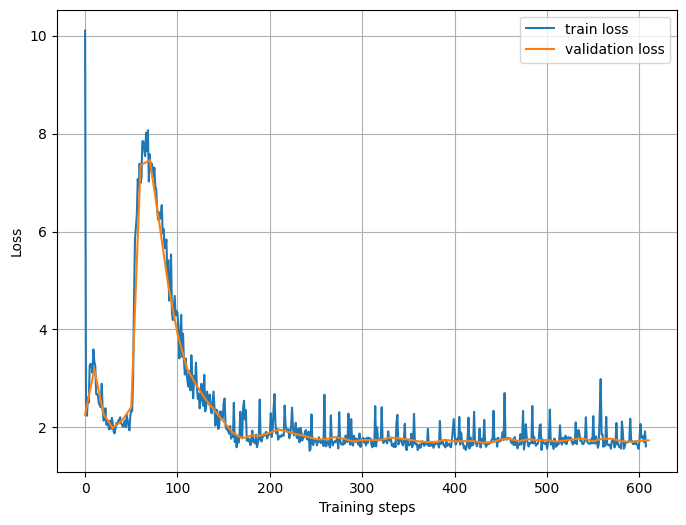

In [67]:
# 5. Plot the fine-tuning loss and MAKE SURE TO SAVE IT AND SUBMIT IT
# plot training losses on x axis
# fig = plt.figure()
fig=plt.figure(figsize=(8,6))
plt.plot(losses,label='train loss')### YOUR CODE HERE ####)
plt.plot(np.arange(0,len(test_losses * 10), 10), test_losses, label='validation loss')
plt.xlabel("Training steps")
plt.ylabel("Loss")
plt.legend()
plt.grid()
fig.savefig(f'loss_commonsenseqa_gpt2_1505.png', dpi=fig.dpi)

In [16]:
# print a few predictions on the eval dataset to see what the model predicts

# construct a list of questions without the ground truth label
# and compare prediction of the model with the ground truth

def construct_test_samples(example):
    """
    Helper for converting input examples which have 
    a separate qquestion, labels, answer options
    into a single string for testing the model.

    Arguments
    ---------
    example: dict
        Sample input from the dataset which contains the 
        question, answer labels (e.g. A, B, C, D),
        the answer options for the question, and which 
        of the answers is correct.
    
    Returns
    -------
    input_text: str, str
        Tuple: Formatted test text which contains the question,
        the forwatted answer options (e.g., 'A. <option 1> B. <option 2>' etc); 
        the ground truth answer label only.
    """

    answer_options_list = list(zip(
        example["choices"]["label"],
        example["choices"]["text"]
    ))
    # join each label and text with . and space
    answer_options = ['. '.join(y) for y in answer_options_list] ### YOUR CODE HERE ####
    # join the list of options with spaces into single string
    answer_options_string = ' '.join(answer_options) ### YOUR CODE HERE ####
    # combine question and answer options
    input_text = example["question"] + " " + answer_options_string
    # create the test input text which should be:
    # the input text, followed by the string "Answer: "
    # we don't need to append the ground truth answer since we are creating test inputs
    # and the answer should be predicted.
    input_text += "\nAnswer: " ### YOUR CODE HERE ####

    return input_text, example["answerKey"]

test_samples = [construct_test_samples(dataset["validation"][i]) for i in range(10)]
test_samples[0]

('A revolving door is convenient for two direction travel, but it also serves as a security measure at a what? A. bank B. library C. department store D. mall E. new york\nAnswer: ',
 'A')

In [17]:
# test_samples

## inspect predictions after finetuning

In [18]:
# Test the model
# set it to evaluation mode
model.eval()

predictions = []
for sample in test_samples:
    input_text = sample[0]
    input_ids = tokenizer(input_text, return_tensors="pt").to(device)
    output = model.generate(
        input_ids.input_ids,
        attention_mask = input_ids.attention_mask,
        max_new_tokens=1,  # originally it was 2
        do_sample=True,
        temperature=0.4,
    )
    prediction = tokenizer.decode(output[0], skip_special_tokens=True)
    print(f"Input text + model's prediction:\n {prediction}\n---")
    print(f"Correct answer: {sample[1]}\n\n")
    predictions.append((input_text, prediction, sample[1]))

# print("Predictions of trained model ", predictions)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Input text + model's prediction:
 A revolving door is convenient for two direction travel, but it also serves as a security measure at a what? A. bank B. library C. department store D. mall E. new york
Answer:  A
---
Correct answer: A


Input text + model's prediction:
 What do people aim to do at work? A. complete job B. learn from each other C. kill animals D. wear hats E. talk to each other
Answer:  A
---
Correct answer: A


Input text + model's prediction:
 Where would you find magazines along side many other printed works? A. doctor B. bookstore C. market D. train station E. mortuary
Answer:  A
---
Correct answer: B




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Input text + model's prediction:
 Where are  you likely to find a hamburger? A. fast food restaurant B. pizza C. ground up dead cows D. mouth E. cow carcus
Answer:  A
---
Correct answer: A


Input text + model's prediction:
 James was looking for a good place to buy farmland.  Where might he look? A. midwest B. countryside C. estate D. farming areas E. illinois
Answer:  C
---
Correct answer: A


Input text + model's prediction:
 What island country is ferret popular? A. own home B. north carolina C. great britain D. hutch E. outdoors
Answer:  B
---
Correct answer: C




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Input text + model's prediction:
 In what Spanish speaking North American country can you get a great cup of coffee? A. mildred's coffee shop B. mexico C. diner D. kitchen E. canteen
Answer:  C
---
Correct answer: B


Input text + model's prediction:
 What do animals do when an enemy is approaching? A. feel pleasure B. procreate C. pass water D. listen to each other E. sing
Answer:  E
---
Correct answer: D


Input text + model's prediction:
 Reading newspaper one of many ways to practice your what? A. literacy B. knowing how to read C. money D. buying E. money bank
Answer:  C
---
Correct answer: A


Input text + model's prediction:
 What do people typically do while playing guitar? A. cry B. hear sounds C. singing D. arthritis E. making music
Answer:  A
---
Correct answer: C




## inspect predictions before any finetuning on this dataset

In [24]:
# Test the model 

org_model = GPT2LMHeadModel.from_pretrained("gpt2").to(device) ### YOUR CODE HERE ####
# set it to evaluation mode
org_model.eval()

predictions = []
for sample in test_samples:
    input_text = sample[0]
    input_ids = tokenizer(input_text, return_tensors="pt").to(device)
    output = org_model.generate(
        input_ids.input_ids,
        attention_mask = input_ids.attention_mask,
        max_new_tokens=2,
        do_sample=True,
        temperature=0.4,
    )
    prediction = tokenizer.decode(output[0], skip_special_tokens=True)
    print(prediction, '\n---')
    predictions.append((input_text, prediction, sample[1]))

# print("Predictions of trained model ", predictions)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


A revolving door is convenient for two direction travel, but it also serves as a security measure at a what? A. bank B. library C. department store D. mall E. new york
Answer:  The 
---
What do people aim to do at work? A. complete job B. learn from each other C. kill animals D. wear hats E. talk to each other
Answer:  If 
---
Where would you find magazines along side many other printed works? A. doctor B. bookstore C. market D. train station E. mortuary
Answer:  I 
---
Where are  you likely to find a hamburger? A. fast food restaurant B. pizza C. ground up dead cows D. mouth E. cow carcus
Answer:  I 
---
James was looking for a good place to buy farmland.  Where might he look? A. midwest B. countryside C. estate D. farming areas E. illinois
Answer:  The 
---


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


What island country is ferret popular? A. own home B. north carolina C. great britain D. hutch E. outdoors
Answer:  The 
---
In what Spanish speaking North American country can you get a great cup of coffee? A. mildred's coffee shop B. mexico C. diner D. kitchen E. canteen
Answer:  I 
---
What do animals do when an enemy is approaching? A. feel pleasure B. procreate C. pass water D. listen to each other E. sing
Answer:  What 
---
Reading newspaper one of many ways to practice your what? A. literacy B. knowing how to read C. money D. buying E. money bank
Answer:  You 
---
What do people typically do while playing guitar? A. cry B. hear sounds C. singing D. arthritis E. making music
Answer:  They 
---


## Accuracy computation

In [63]:
all_test_samples = [construct_test_samples(dataset["validation"][i]) for i in range(len(dataset["validation"]))]
all_train_samples = [construct_test_samples(dataset["train"][i]) for i in range(len(dataset["train"]))]
print(f'len train = {len(all_train_samples)}, len val = {len(all_test_samples)}')

len train = 9741, len val = 1221


In [64]:
def compute_accuracy(list_of_samples, model):
    model.eval()

    correct = 0
    for sample in test_samples:
        input_text = sample[0]
        input_ids = tokenizer(input_text, return_tensors="pt").to(device)
        output = model.generate(
            input_ids.input_ids,
            attention_mask = input_ids.attention_mask,
            max_new_tokens=1,
            do_sample=True,
            temperature=0.4,
        )
        prediction = tokenizer.decode(output[0], skip_special_tokens=True)
        # print(prediction, '\n---')
        # print(prediction[len(input_text):].strip())
        predicted_answer_key = prediction[len(input_text):].strip()
        true_answer_key = sample[1]
        if predicted_answer_key == true_answer_key:
            correct += 1


    return correct, len(list_of_samples), correct/len(list_of_samples)

In [65]:
compute_accuracy(all_test_samples, org_model), compute_accuracy(all_train_samples, org_model)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

((0, 1221, 0.0), (0, 9741, 0.0))

In [66]:
compute_accuracy(all_test_samples, model), compute_accuracy(all_train_samples, model)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

((4, 1221, 0.003276003276003276), (2, 9741, 0.0002053177291859152))

## Questions:
> 1. Provide a brief description of the CommonsenseQA dataset. What kind of task was it developed for, what do the single columns contain?

CommonsenseQA dataset was developed to assess the performance of language models in question-answering tasks that require some form of prior knowledge or world knowledge that humans find _straightforward_ (hence "commonsense"). It contains multiple choice answer type questions with only single correct answer and these questions are supposedly easy to answer for humans without any associated context (e.g., long paragraphs or passages).

The dataset has 5 columns:

 - id: a unique identifier for each question
 - question: actual text for the question
 - question_concept: the background of the question, some real world idea or concept
 - choices: contains `label`s (A, B, C or D) and their corresponding response `text`s in a dictionary
 - answerKey: the groundtruth answer key (one of A, B, C or D)

---

> 2. What loss function is computed for this training? Provide the name of the function (conceptual, not necessarily the name of a function in the code).

The **cross-entropy loss** function is computed for this training. It is computed using the computed distribution over the next token (a vector having positive values of size $V$, summing to 1), and the actual next token (a one-hot vector of size $V$ with 1 at the index of the next token).

---

> 3. Given your loss curve, do you think your model will perform well on answering common sense questions? (Note: there is no single right answer; you need to interpret your specific plot)

From the loss plot, we can see that both training and validation losses seem to have converged to a loss below $2$, although there are small irregularities. I have also increased the no. of epochs (to 2), but the loss did not decrease further. Even though the loss has converged, upon inspection of predictions, we see that the model is still predicting wrong answers for most of the questions.


---
> 4. Inspect the predictions above. On how many test questions did the model predict the right answer? Compute the accuracy.

Observations from above cells:
- Before finetuning, `org_model` was generating tokens like: "The", "If", "I", "You" etc. that do not correspond to the answer keys. This may be because model was trying to answer the question in a full sentence, or it is likely generating tokens that are most likely to begin a sentence.
- After the finetuning, I observe that the `model` is indeed predicting tokens corresponding to the answer keys, so there is definitely some improvement of finetuning on this particular dataset. However, almost all of the answers predicted by the model is wrong so it is still a bad model in doing the task that it was finetuned to do.
- The accuracy over all training/test samples is very low, For the original (not finetuned) model, it is $0$. For the finetuned model, the model got only 4 correct out of 1221 samples. Interestingly it also got most of the training samples wrong, despite the converged loss value on the training set!



---